## __*Atividade Avaliativa 03 - Parte 1*__

Considerando o conjunto de dados Bike Sharing Data Set:
1. Explorar visualmente e numericamente os dados;
2. Preparar os conjunto de dados utilizando as técnicas ensinadas na disciplina, quando pertinente;
3. Para cada técnica de preparação de dados aplicada, avaliar os algorimos de regressão estudados na disciplina para estimar a variável alvo **cnt (count of total rental bikes including both casual and registered)**.
4. Utilizar gráficos e tabelas para apresentar as métricas obtidas (em treino e em teste), e escolher o melhor modelo com base em uma das métricas apresentadas. Justificar a escolha da métrica com base no sistema em questão;
5. Enviar a URL do jupyter notebook no GitHub.
____________________

## __Identificação do problema__

O problema em questão trata-se de tentar prever a qauntidade de bicicletas seriam alugadas dados como dados de entrada algumas features selecionadas. Serão utilizados os principais algoritmos de regressão para essa finalidade.
________________________

## *Passo 1 - Setup do projeto*
#### Importação das bibliotecas e identificação do endereço de download do dataset.

In [1]:
import os
import urllib

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

print(f'Matplot version: {matplotlib.__version__}')
print(f'Numpy version: {np.__version__}')
print(f'Pandas version: {pd.__version__}')
print(f'Scikit-learn version: {sklearn.__version__}')
print(f'Seaborn version: {sns.__version__}')

DOWNLOAD_ROOT = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00275/'
BIKE_PATH = os.path.join('data', 'raw')
BIKE_URL = DOWNLOAD_ROOT + 'Bike-Sharing-Dataset.zip' 

BIKE_FILE = 'day.csv'
BIKE_DATA = os.path.join(BIKE_PATH, BIKE_FILE)

RANDOM_STATE = 42

print('\nConfiguração completa !')

Matplot version: 3.3.4
Numpy version: 1.19.2
Pandas version: 1.2.3
Scikit-learn version: 0.24.1
Seaborn version: 0.11.1

Configuração completa !


__________________________________
## *Passo 2 - Download e Carregamento dos Dados*
#### Download do dataset e carregamento do mesmo para um DataFrame.

In [2]:
from zipfile import ZipFile

def download_data(bike_url, bike_path):
    if not os.path.isdir(bike_path):
        os.makedirs(bike_path)
    zip_path = os.path.join(bike_path, 'Bike-Sharing-Dataset.zip')

    urllib.request.urlretrieve(bike_url, zip_path)
    
    with ZipFile(zip_path, 'r') as zip:
        zip.extractall(bike_path)

download_data(BIKE_URL, BIKE_PATH)

In [3]:
def load_data(data_path, data_file):
    local_path = os.path.join(data_path, data_file)
    return pd.read_csv(local_path)

bike_df = load_data(BIKE_PATH, BIKE_FILE)

_____________________
## *Passo 3 - Análise Exploratória de Dados*
#### Análise dos dados buscando identificar dados inválidos e faltantes. Nessa etapa os dados serão transformados e normalizados, caso haja necessidade.

In [4]:
print(f'O dataframe bike_df possui {bike_df.shape[0]} linhas e {bike_df.shape[1]} colunas.')

O dataframe bike_df possui 731 linhas e 16 colunas.


In [5]:
bike_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [6]:
from datetime import datetime

datas = bike_df['dteday']
datas = [datetime.strptime(data, '%Y-%m-%d') for data in datas]

year = []; month = []; day = []

for i in range(len(datas)):
    year.append(datas[i].year)
    month.append(datas[i].month)
    day.append(datas[i].day)

In [7]:
# Nesta etapa a coluna de datas foi separada em colunas contendo os dias, meses e anos, sendo excluída posteriormente.

bike_df.insert(loc=1, column='year', value=year)
bike_df.insert(loc=2, column='month', value=month)
bike_df.insert(loc=3, column='day', value=day)
bike_df.drop(['dteday', 'instant', 'mnth', 'yr'], axis=1, inplace=True)

In [8]:
# As features casual e registered serão excluídas devido ao fato de ser muito complicado prever a quantidade de bicicletas que serão locadas em dias futuros
# e por já estarem contidas na feature cnt.

# A feature cont será mantida pois trata-se da soma das locações de bicicletas e a variável alvo a ser analisada

bike_df.drop(['casual', 'registered'], axis=1, inplace=True)

In [9]:
bike_df.describe()

,year,month,day,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2011.500684,6.519836,15.738714,2.496580,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,4504.348837
std,0.500342,3.451913,8.809949,1.110807,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,1937.211452
min,2011.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,22.000000
25%,2011.000000,4.000000,8.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,3152.000000
50%,2012.000000,7.000000,16.000000,3.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,4548.000000
75%,2012.000000,10.000000,23.000000,3.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,5956.000000
max,2012.000000,12.000000,31.000000,4.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,8714.000000


In [10]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        731 non-null    int64  
 1   month       731 non-null    int64  
 2   day         731 non-null    int64  
 3   season      731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  cnt         731 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.4 KB


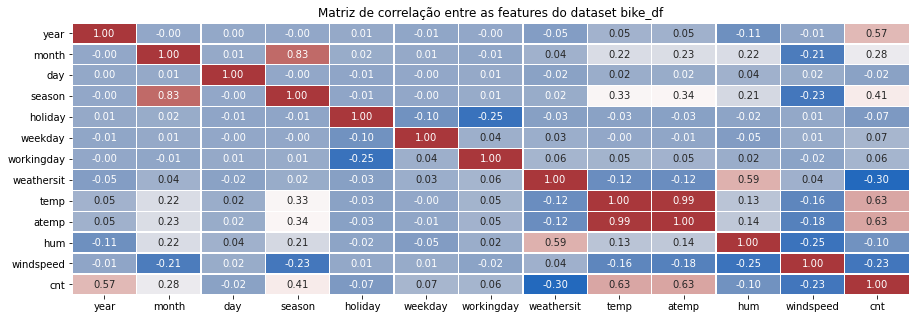

In [11]:
# Apresentação da matrix de correlações para eliminação de features

corr_matrix = bike_df.corr()

plt.figure(figsize=(15, 5))
_ = sns.heatmap(corr_matrix, square=False, annot=True, cbar=False, linewidths=0.3, cmap='vlag', fmt='.2f')
_ = plt.title('Matriz de correlação entre as features do dataset bike_df')

In [12]:
# A feature atemp será excluída pois possui forte correlação com a feature temp

bike_df.drop(['atemp'], axis=1, inplace=True)

In [13]:
# A feature holiday será excluída pois possui correlação com a feature workingday e por ser uma variável bastante esparsa quando comparada às demais

bike_df.drop(['holiday'], axis=1, inplace=True)

In [14]:
# A feature windspeed será excluída pois possui boa correlação com as features season, month e hum

bike_df.drop(['windspeed'], axis=1, inplace=True)

In [15]:
# A feature season será excluída pois possui forte correlação com a feature month

bike_df.drop(['season'], axis=1, inplace=True)

In [16]:
# As features numéricas wheatersit e weekday serão transformadas em One Hot Encoder para se evitar de o algoritmo atribuir pesos diferentes às features

bike_df=pd.get_dummies(bike_df,columns=['weathersit', 'weekday'], drop_first=True)

In [17]:
bike_df.head()

,year,month,day,workingday,temp,hum,cnt,weathersit_2,weathersit_3,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,2011,1,1,0,0.344167,0.805833,985,1,0,0,0,0,0,0,1
1,2011,1,2,0,0.363478,0.696087,801,1,0,0,0,0,0,0,0
2,2011,1,3,1,0.196364,0.437273,1349,0,0,1,0,0,0,0,0
3,2011,1,4,1,0.200000,0.590435,1562,0,0,0,1,0,0,0,0
4,2011,1,5,1,0.226957,0.436957,1600,0,0,0,0,1,0,0,0


In [18]:
X = bike_df.drop(['cnt'], axis=1)
y = bike_df['cnt']

_____________
### Normalização das escalas das *features* para aplicação no algoritmo.

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X))
X_scaled.columns = X.columns

X_scaled

,year,month,day,workingday,temp,hum,weathersit_2,weathersit_3,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0.0,0.0,0.000000,0.0,0.355170,0.828620,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.033333,0.0,0.379232,0.715771,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.066667,1.0,0.171000,0.449638,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.100000,1.0,0.175530,0.607131,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.133333,1.0,0.209120,0.449313,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1.0,1.0,0.866667,1.0,0.243025,0.671380,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
727,1.0,1.0,0.900000,1.0,0.241986,0.606684,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
728,1.0,1.0,0.933333,0.0,0.241986,0.774208,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
729,1.0,1.0,0.966667,0.0,0.245101,0.497001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


_____________
## *Passo 4 - Treinamento do Modelo*
#### Nessa etapa, os dados serão divididos em sets de treinamento e teste e aplicados nos algoritmos de Machine Learning, sendo escolhidos alguns ajustes para os hiperparâmetros mais importantes, no qual o Cross Validation selecionará os mais efetivos.

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.3, random_state=RANDOM_STATE)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (511, 14)
y_train shape: (511,)
X_test shape: (220, 14)
y_test shape: (220,)


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

def build_regressors():
    regressors = []
    regressors.append(
        ('lr',
         LinearRegression(),
         {'fit_intercept': [True, False]}
        )
    )
    
    regressors.append(
        ('svr',
         SVR(),
         {'C': [0.1, 1, 10],
          'gamma': [0.00001, 0.0001, 0.001, 0.01, 1],
          'epsilon': [0.0001, 0.001, 0.01, 1, 10],
          'kernel': ['poly', 'rbf'],
          'degree': [2, 3, 4]}
         )
    )
    
    regressors.append(
        ('tree',
         DecisionTreeRegressor(random_state=RANDOM_STATE),
         {'max_depth' : [2, 4, 6, 8, 10, 12],
          'splitter' : ['best', 'random']}
        )
    )
    
    regressors.append(
        ('rf',
         RandomForestRegressor(random_state=RANDOM_STATE),
         {'n_estimators' : [50, 100, 150]}
        )
    )
    return regressors

regressors = build_regressors()

In [22]:
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error

train_results = []
test_results = []
names = []

scoring = 'neg_root_mean_squared_error'

kfold = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

for name, regressor, params in regressors:
    print(f'>>> regressor: {name}')
    gs = GridSearchCV(regressor, param_grid=params, scoring=scoring)
    gs.fit(X_train, y_train)
    cv_results = cross_val_score(gs, X_train, y_train, cv=kfold, scoring=scoring)
    names.append(name)
    train_results.append(abs(cv_results))
 
    print(f'Mean: {-1 * cv_results.mean():.4f}, Standart Deviation: {cv_results.std():.4f}')
    print(f'Melhor resultado com {gs.best_params_} foi de {-1 * gs.best_score_:.4f}\n')
    
    y_pred = gs.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    test_results.append(rmse)

>>> regressor: lr
Mean: 994.1639, Standart Deviation: 64.8364
Melhor resultado com {'fit_intercept': True} foi de 973.2668

>>> regressor: svr
Mean: 1127.1952, Standart Deviation: 98.3976
Melhor resultado com {'C': 10, 'degree': 3, 'epsilon': 10, 'gamma': 1, 'kernel': 'poly'} foi de 1134.2970

>>> regressor: tree
Mean: 985.1780, Standart Deviation: 114.4211
Melhor resultado com {'max_depth': 8, 'splitter': 'random'} foi de 962.7262

>>> regressor: rf
Mean: 774.7664, Standart Deviation: 70.7017
Melhor resultado com {'n_estimators': 50} foi de 793.2543



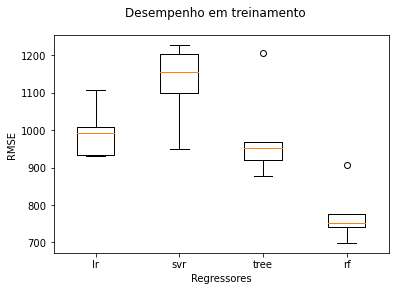

In [23]:
fig, ax = plt.subplots()
fig.suptitle('Desempenho em treinamento')
_ = plt.boxplot(train_results)
_ = ax.set_xticklabels(names)
_ = ax.set_ylabel('RMSE')
_ = ax.set_xlabel('Regressores')

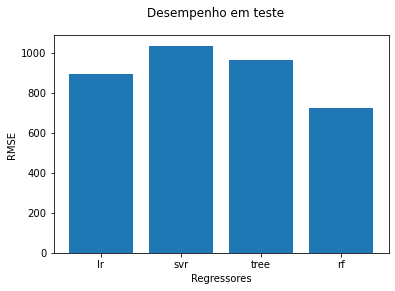

In [24]:
fig, ax = plt.subplots()
fig.suptitle('Desempenho em teste')
_ = plt.bar(names, test_results)
_ = ax.set_ylabel('RMSE')
_ = ax.set_xlabel('Regressores')

_____________
## *Passo 5 - Escolha do Modelo*
#### Baseado nos resultados acima, o regressor Florestas Aleatórias foi o que apresentou o melhor resultado (apesar de ainda estar bastante alto para a problemática da situação). Nas próximas etapas o modelo será melhor analisado no intuito de se tentar malhorar o resultado

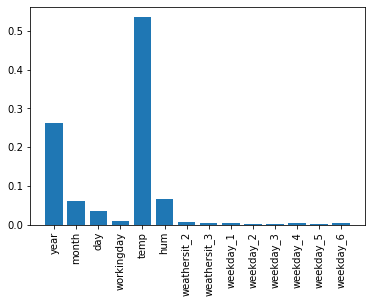

In [25]:
# Escolha das features mais importantes

rf = RandomForestRegressor(n_estimators=50, random_state=RANDOM_STATE)
rf.fit(X_train, y_train)

colunas = list(X_train.columns)

importancias = list(rf.feature_importances_)
variaveis_importancias = [(coluna, importancia) for coluna, importancia in zip(colunas, importancias)]
variaveis_importancias = sorted(variaveis_importancias, key=lambda x:x[1], reverse=True)

X_valores = list(range(len(importancias)))
_ = plt.bar(X_valores, importancias)
_ = plt.xticks(X_valores, colunas[:], rotation=90)

In [26]:
rf_imp = RandomForestRegressor(n_estimators=50, random_state=RANDOM_STATE)
indices = [colunas.index('year'), colunas.index('month'), colunas.index('day'), colunas.index('temp'), colunas.index('hum')]
X_train_imp = X_train.iloc[:, indices]
X_test_imp = X_test.iloc[:, indices]

rf_imp.fit(X_train_imp, y_train)

y_pred = rf_imp.predict(X_test_imp)
print(f'RMSE:  {mean_squared_error(y_test, y_pred, squared=False)}')

RMSE:  763.9431257400347


## __*Resultado:*__

### O RMSE do Random Forest apenas com as features mais importantes se mostrou ligeiramente melhor que o contando todo o dataset. Ainda assim, o valor calculado para a regressão ainda é bastante alto para o tipo de problema a ser analisado.